In [1]:
import glob
from os.path import abspath 
import json

import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,8)})

# --- open several .csv files
def get_data(path):
    df_group = [pd.read_pickle(i_path) for i_path in glob.glob(path)]
    return pd.concat(df_group)

# --- unzip non-dominated results into rows
def explode_ndf(df):
    df['zip'] = df[['ndf_f', 'ndf_x']].apply(lambda row: list(zip(*row.values)), axis=1)
    df.drop(['ndf_f', 'ndf_x'], axis=1, inplace=True)
    df = df.explode('zip')
    
    df = pd.concat([df.reset_index(drop=True), 
               pd.DataFrame.from_records(df['zip'].values, columns=['obj', 'params'])],
              axis=1).drop('zip', 1)
    
    # --- column for each objective     
    obj_df = pd.DataFrame.from_records(df['obj'].values, columns=df['objectives'].iloc[0])
    df = pd.concat([df.reset_index(drop=True), obj_df],
          axis=1).drop(['obj', 'objectives'], 1)

    return df   

In [2]:
raw_df = get_data("results_paper/open_ml_31/GaussianProcessRegressor_2_RF.*.pkl")
raw_df

,iteration,problem,objectives,feature_dim,ndf_size,ndf_f,ndf_x,i_time,model_id
0,1,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,2,"[[0.7667350182800826, 0.027927557627360027], [...","[[entropy, 60.0, 0.2037250044368072, 0.0824911...",36.473726,139643527543216
1,2,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,2,"[[0.5, 0.026118357976277668], [0.5, 0.02626474...","[[entropy, 18.167899779948602, 0.9999999879992...",54.516037,139643527543216
2,3,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,2,"[[0.5, 0.026118357976277668], [0.5, 0.02626474...","[[entropy, 18.167899779948602, 0.9999999879992...",73.217416,139643527543216
3,4,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,3,"[[0.5, 0.026118357976277668], [0.5, 0.02626474...","[[entropy, 18.167899779948602, 0.9999999879992...",101.313956,139643527543216
4,5,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,3,"[[0.5, 0.026118357976277668], [0.5, 0.02626474...","[[entropy, 18.167899779948602, 0.9999999879992...",146.970307,139643527543216
...,...,...,...,...,...,...,...,...,...
95,96,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,4,"[[0.4793162393162393, 0.04361287752787272], [0...","[[entropy, 17.038132538160763, 5.4545238877684...",39867.932828,140446023050160
96,97,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,4,"[[0.4793162393162393, 0.04361287752787272], [0...","[[entropy, 17.038132538160763, 5.4545238877684...",40952.712061,140446023050160
97,98,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,4,"[[0.4793162393162393, 0.04361287752787272], [0...","[[entropy, 17.038132538160763, 5.4545238877684...",41665.467797,140446023050160
98,99,GaussianProcessRegressor,"[test_roc_auc, fit_time]",7,4,"[[0.4793162393162393, 0.04361287752787272], [0...","[[entropy, 17.038132538160763, 5.4545238877684...",42464.418029,140446023050160


In [3]:
df = get_data("results_paper/open_ml_31/GaussianProcessRegressor_2_RF.*.pkl")
df = explode_ndf(df)
df

,iteration,problem,feature_dim,ndf_size,i_time,model_id,params,test_roc_auc,fit_time
0,1,GaussianProcessRegressor,7,2,36.473726,139643527543216,"[entropy, 60.0, 0.2037250044368072, 0.08249117...",0.766735,0.027928
1,1,GaussianProcessRegressor,7,2,36.473726,139643527543216,"[entropy, 60.0, 0.9999850442497041, 0.08249117...",0.500000,0.030146
2,2,GaussianProcessRegressor,7,2,54.516037,139643527543216,"[entropy, 18.167899779948602, 0.99999998799928...",0.500000,0.026118
3,2,GaussianProcessRegressor,7,2,54.516037,139643527543216,"[entropy, 36.924408920011196, 0.99999982565311...",0.500000,0.026265
4,3,GaussianProcessRegressor,7,2,73.217416,139643527543216,"[entropy, 18.167899779948602, 0.99999998799928...",0.500000,0.026118
...,...,...,...,...,...,...,...,...,...
3307,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[entropy, 17.038132538160763, 5.45452388776845...",0.479316,0.043613
3308,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 39.09707059989364, 0.5179368427804467, ...",0.482165,0.019506
3309,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 39.565836410857244, 0.9098500428352563,...",0.500000,0.017494
3310,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 40.34477940406965, 0.10162135053195424,...",0.694426,0.016120


<AxesSubplot:xlabel='iteration', ylabel='ndf_size_%'>

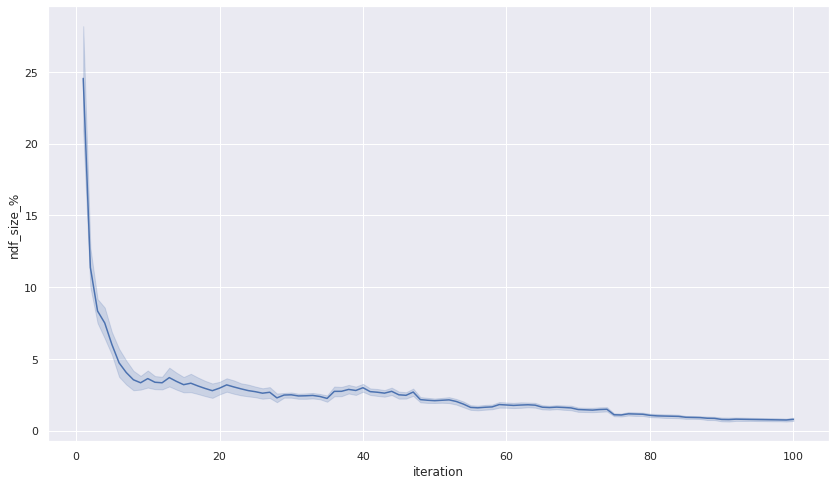

In [4]:
df['ndf_size_%'] = df['ndf_size'] / (df['iteration']*10) * 100
df['test_roc_auc_%'] = df['test_roc_auc'] * 100
df['fit_time_%'] = (1 - df['fit_time'] / df.max()["fit_time"]) * 100


sns.lineplot(x="iteration", 
             y="ndf_size_%", 
#              hue="model_id",
             data=df)

# sns.lineplot(x="iteration", 
#              y="test_roc_auc_%", 
# #              hue="model_id",
#              data=df)

# sns.lineplot(x="iteration", 
#              y="fit_time_%", 
# #              hue="model_id",
#              data=df)

# plt.legend(loc='upper left', labels=['ndf_size_%', 'test_roc_auc_%', 'fit_time_%'])

In [5]:
import numpy as np
#integrate using the trapezodial rule
np.trapz(y=df["ndf_size_%"], x=df["iteration"])

-3586.753607139564

In [6]:
# Hypervolume
# find a reference point = [1 - min roc_auc, max fit_time] 
# roc_auc is inversed for minimization

df.max()["fit_time"]
ref_point = np.array([1 - df.min()["test_roc_auc"], df.max()["fit_time"]])
ref_point

array([0.5247151 , 0.27828105])

In [7]:
# combine objectives + inverse roc_auc for minimization
df["ndf_f_p"] = df.apply(lambda row: np.array([1 - row["test_roc_auc"], row["fit_time"]]), axis=1)
df

,iteration,problem,feature_dim,ndf_size,i_time,model_id,params,test_roc_auc,fit_time,ndf_size_%,test_roc_auc_%,fit_time_%,ndf_f_p
0,1,GaussianProcessRegressor,7,2,36.473726,139643527543216,"[entropy, 60.0, 0.2037250044368072, 0.08249117...",0.766735,0.027928,20.000000,76.673502,89.964262,"[0.23326498171991739, 0.027927557627360027]"
1,1,GaussianProcessRegressor,7,2,36.473726,139643527543216,"[entropy, 60.0, 0.9999850442497041, 0.08249117...",0.500000,0.030146,20.000000,50.000000,89.167223,"[0.5, 0.030145565668741863]"
2,2,GaussianProcessRegressor,7,2,54.516037,139643527543216,"[entropy, 18.167899779948602, 0.99999998799928...",0.500000,0.026118,10.000000,50.000000,90.614396,"[0.5, 0.026118357976277668]"
3,2,GaussianProcessRegressor,7,2,54.516037,139643527543216,"[entropy, 36.924408920011196, 0.99999982565311...",0.500000,0.026265,10.000000,50.000000,90.561791,"[0.5, 0.026264746983846027]"
4,3,GaussianProcessRegressor,7,2,73.217416,139643527543216,"[entropy, 18.167899779948602, 0.99999998799928...",0.500000,0.026118,6.666667,50.000000,90.614396,"[0.5, 0.026118357976277668]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[entropy, 17.038132538160763, 5.45452388776845...",0.479316,0.043613,0.500000,47.931624,84.327759,"[0.5206837606837607, 0.04361287752787272]"
3308,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 39.09707059989364, 0.5179368427804467, ...",0.482165,0.019506,0.500000,48.216524,92.990462,"[0.5178347578347577, 0.019506216049194336]"
3309,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 39.565836410857244, 0.9098500428352563,...",0.500000,0.017494,0.500000,50.000000,93.713706,"[0.5, 0.017493565877278645]"
3310,100,GaussianProcessRegressor,7,5,43605.562063,140446023050160,"[gini, 40.34477940406965, 0.10162135053195424,...",0.694426,0.016120,0.500000,69.442558,94.207254,"[0.30557441644351524, 0.016120115915934246]"


In [8]:
# 
grouped_df = df.groupby(["i_time"]).agg(lambda x: x.tolist())
grouped_df

,iteration,problem,feature_dim,ndf_size,model_id,params,test_roc_auc,fit_time,ndf_size_%,test_roc_auc_%,fit_time_%,ndf_f_p
i_time,,,,,,,,,,,,
21.665207,"[1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7]","[2, 2]","[140329358675440, 140329358675440]","[[entropy, 68.0, 0.9413212766296681, 0.3919968...","[0.5, 0.5]","[0.03651905059814453, 0.03579854965209961]","[20.0, 20.0]","[50.0, 50.0]","[86.87691805941651, 87.13582930706258]","[[0.5, 0.03651905059814453], [0.5, 0.035798549..."
25.379927,"[1, 1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7]","[3, 3, 3]","[140446023050160, 140446023050160, 14044602305...","[[gini, 38.0, 0.3125, 0.34375, 0.28125, sqrt, ...","[0.5, 0.508497150997151, 0.5]","[0.13784416516621908, 0.02738332748413086, 0.2...","[30.0, 30.0, 30.0]","[50.0, 50.8497150997151, 50.0]","[50.465846048047936, 90.15983043112463, 0.0]","[[0.5, 0.13784416516621908], [0.49150284900284..."
26.425264,"[1, 1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7]","[3, 3, 3]","[140284775645936, 140284775645936, 14028477564...","[[gini, 47.0, 4.027882194446164e-11, 7.4407945...","[0.5172364672364672, 0.51997150997151, 0.5]","[0.03391003608703613, 0.030077377955118816, 0....","[30.0, 30.0, 30.0]","[51.72364672364672, 51.997150997150996, 50.0]","[87.81446464544923, 89.19172626347033, 87.4442...","[[0.4827635327635328, 0.03391003608703613], [0..."
26.553065,[1],[GaussianProcessRegressor],[7],[1],[139626641589680],"[[gini, 112.0, 0.3181104166374933, 9.453033419...",[0.48002849002848996],[0.025618314743041992],[10.0],[48.002849002849],[90.79408587994126],"[[0.5199715099715101, 0.025618314743041992]]"
36.473726,"[1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7]","[2, 2]","[139643527543216, 139643527543216]","[[entropy, 60.0, 0.2037250044368072, 0.0824911...","[0.7667350182800826, 0.5]","[0.027927557627360027, 0.030145565668741863]","[20.0, 20.0]","[76.67350182800826, 50.0]","[89.9642619087465, 89.16722308119806]","[[0.23326498171991739, 0.027927557627360027], ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
42720.932948,"[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]","[140284775645936, 140284775645936, 14028477564...","[[entropy, 119.89813525550217, 6.9861332205323...","[0.6594710392135285, 0.5674517014538475, 0.486...","[0.02432417869567871, 0.0467829704284668, 0.06...","[1.1111111111111112, 1.1111111111111112, 1.111...","[65.94710392135285, 56.74517014538475, 48.6467...","[91.2591322903393, 83.18858939920368, 77.75542...","[[0.34052896078647155, 0.02432417869567871], [..."
43328.182051,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]","[140284775645936, 140284775645936, 14028477564...","[[entropy, 119.89813525550217, 6.9861332205323...","[0.6594710392135285, 0.5674517014538475, 0.486...","[0.02432417869567871, 0.0467829704284668, 0.06...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, ...","[65.94710392135285, 56.74517014538475, 48.6467...","[91.2591322903393, 83.18858939920368, 77.75542...","[[0.34052896078647155, 0.02432417869567871], [..."
43471.564090,"[99, 99, 99, 99, 99]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7]","[5, 5, 5, 5, 5]","[140329358675440, 140329358675440, 14032935867...","[[entropy, 41.562539062523605, 0.9696157297160...","[0.5, 0.4778347578347579, 0.5166524216524216, ...","[0.06185770034790039, 0.045085509618123375, 0....","[0.5050505050505051, 0.5050505050505051, 0.505...","[50.0, 47.78347578347579, 51.66524216524216, 5...","[77.77150125685904, 83.79857013364801, 92.3502...","[[0.5, 0.06185770034790039], [0.52216524216524..."


In [9]:
import pygmo as pg
# --- Update Hypervolume
def compute_hypervolume(row, ref_point):
    hypervolume = pg.hypervolume(row["ndf_f_p"]).compute(ref_point) 
    row["hypervolume"] = hypervolume
    return row

In [10]:
grouped_df = grouped_df.apply(lambda row: compute_hypervolume(row, ref_point), axis=1)
grouped_df

,iteration,problem,feature_dim,ndf_size,model_id,params,test_roc_auc,fit_time,ndf_size_%,test_roc_auc_%,fit_time_%,ndf_f_p,hypervolume
i_time,,,,,,,,,,,,,
21.665207,"[1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7]","[2, 2]","[140329358675440, 140329358675440]","[[entropy, 68.0, 0.9413212766296681, 0.3919968...","[0.5, 0.5]","[0.03651905059814453, 0.03579854965209961]","[20.0, 20.0]","[50.0, 50.0]","[86.87691805941651, 87.13582930706258]","[[0.5, 0.03651905059814453], [0.5, 0.035798549...",0.005993
25.379927,"[1, 1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7]","[3, 3, 3]","[140446023050160, 140446023050160, 14044602305...","[[gini, 38.0, 0.3125, 0.34375, 0.28125, sqrt, ...","[0.5, 0.508497150997151, 0.5]","[0.13784416516621908, 0.02738332748413086, 0.2...","[30.0, 30.0, 30.0]","[50.0, 50.8497150997151, 50.0]","[50.465846048047936, 90.15983043112463, 0.0]","[[0.5, 0.13784416516621908], [0.49150284900284...",0.008333
26.425264,"[1, 1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7]","[3, 3, 3]","[140284775645936, 140284775645936, 14028477564...","[[gini, 47.0, 4.027882194446164e-11, 7.4407945...","[0.5172364672364672, 0.51997150997151, 0.5]","[0.03391003608703613, 0.030077377955118816, 0....","[30.0, 30.0, 30.0]","[51.72364672364672, 51.997150997150996, 50.0]","[87.81446464544923, 89.19172626347033, 87.4442...","[[0.4827635327635328, 0.03391003608703613], [0...",0.011091
26.553065,[1],[GaussianProcessRegressor],[7],[1],[139626641589680],"[[gini, 112.0, 0.3181104166374933, 9.453033419...",[0.48002849002848996],[0.025618314743041992],[10.0],[48.002849002849],[90.79408587994126],"[[0.5199715099715101, 0.025618314743041992]]",0.001199
36.473726,"[1, 1]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7]","[2, 2]","[139643527543216, 139643527543216]","[[entropy, 60.0, 0.2037250044368072, 0.0824911...","[0.7667350182800826, 0.5]","[0.027927557627360027, 0.030145565668741863]","[20.0, 20.0]","[76.67350182800826, 50.0]","[89.9642619087465, 89.16722308119806]","[[0.23326498171991739, 0.027927557627360027], ...",0.072966
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42720.932948,"[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]","[140284775645936, 140284775645936, 14028477564...","[[entropy, 119.89813525550217, 6.9861332205323...","[0.6594710392135285, 0.5674517014538475, 0.486...","[0.02432417869567871, 0.0467829704284668, 0.06...","[1.1111111111111112, 1.1111111111111112, 1.111...","[65.94710392135285, 56.74517014538475, 48.6467...","[91.2591322903393, 83.18858939920368, 77.75542...","[[0.34052896078647155, 0.02432417869567871], [...",0.066905
43328.182051,"[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]","[12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]","[140284775645936, 140284775645936, 14028477564...","[[entropy, 119.89813525550217, 6.9861332205323...","[0.6594710392135285, 0.5674517014538475, 0.486...","[0.02432417869567871, 0.0467829704284668, 0.06...","[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, ...","[65.94710392135285, 56.74517014538475, 48.6467...","[91.2591322903393, 83.18858939920368, 77.75542...","[[0.34052896078647155, 0.02432417869567871], [...",0.074691
43471.564090,"[99, 99, 99, 99, 99]","[GaussianProcessRegressor, GaussianProcessRegr...","[7, 7, 7, 7, 7]","[5, 5, 5, 5, 5]","[140329358675440, 140329358675440, 14032935867...","[[entropy, 41.562539062523605, 0.9696157297160...","[0.5, 0.4778347578347579, 0.5166524216524216, ...","[0.06185770034790039, 0.045085509618123375, 0....","[0.5050505050505051, 0.5050505050505051, 0.505...","[50.0, 47.78347578347579, 51.66524216524216, 5...","[77.77150125685904, 83.79857013364801, 92.3502...","[[0.5, 0.06185770034790039], [0.52216524216524...",0.010951


In [11]:
grouped_df["it"]  = grouped_df["iteration"].map(lambda x: np.mean(x))

<AxesSubplot:xlabel='it', ylabel='hypervolume'>

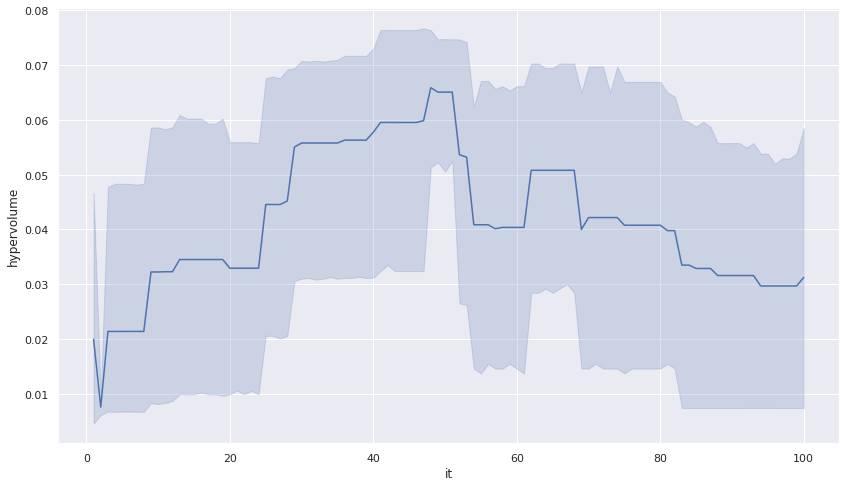

In [12]:
sns.lineplot(x="it", 
             y="hypervolume", 
#              hue="model_id",
             data=grouped_df)

# sns.lineplot(x="iteration", 
#              y="test_roc_auc_%", 
# #              hue="model_id",
#              data=df)

# sns.lineplot(x="iteration", 
#              y="fit_time_%", 
# #              hue="model_id",
#              data=df)

# plt.legend(loc='upper left', labels=['ndf_size_%', 'test_roc_auc_%', 'fit_time_%'])

<AxesSubplot:xlabel='iteration', ylabel='test_roc_auc'>

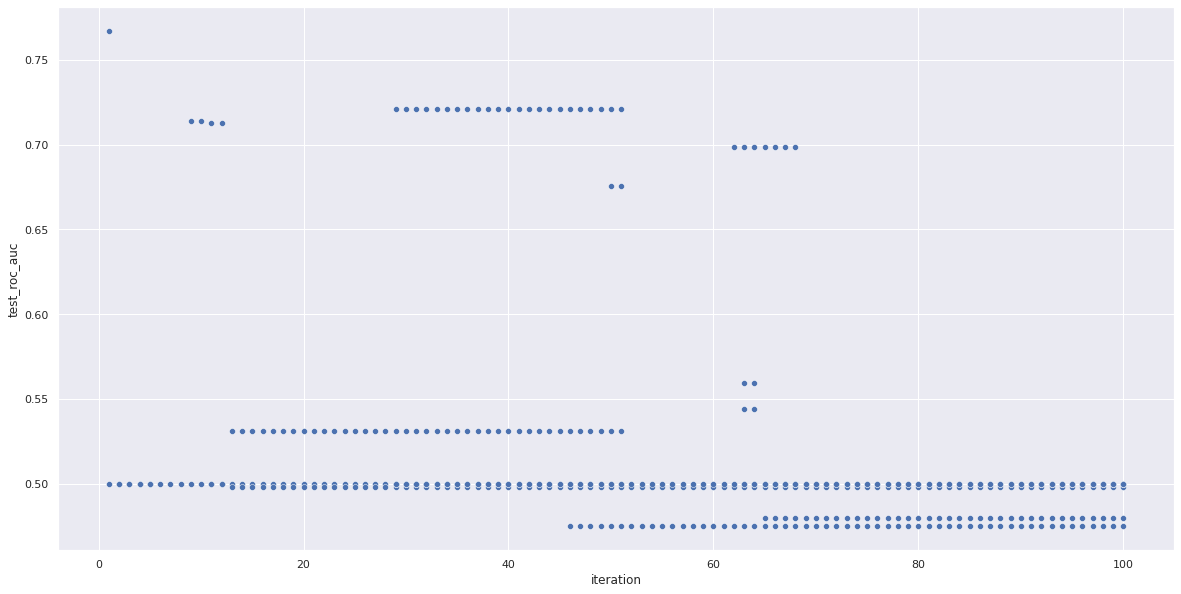

In [13]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==139643527543216]

sns.scatterplot(x="iteration", y="test_roc_auc", data=df_single)

<AxesSubplot:xlabel='iteration', ylabel='fit_time'>

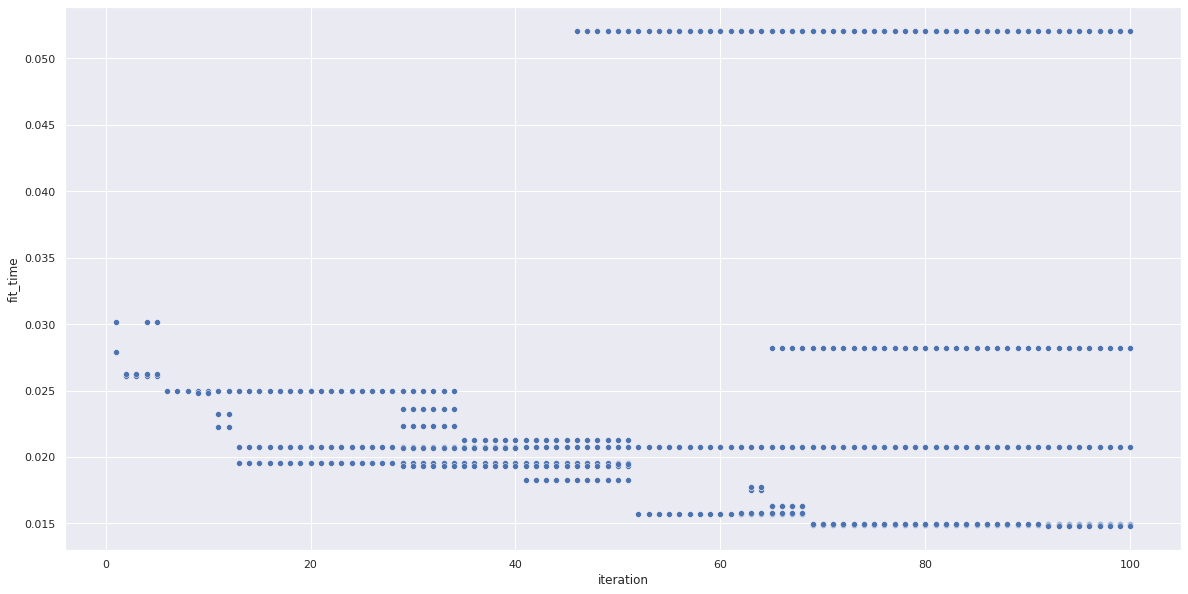

In [14]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==139643527543216]

sns.scatterplot(x="iteration", y="fit_time", data=df_single)

<AxesSubplot:xlabel='iteration', ylabel='ndf_size'>

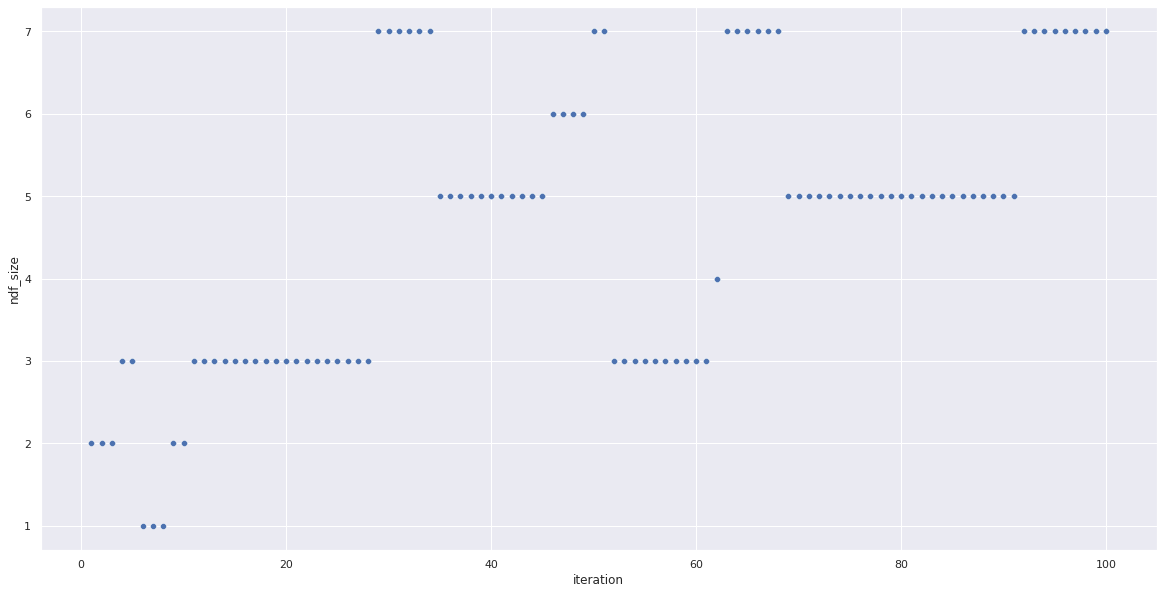

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==139643527543216]

sns.scatterplot(x="iteration", y="ndf_size", data=df_single)

In [16]:
df = get_data("results_paper/open_ml_31/separate(GradientBoostingRegressor+GradientBoostingRegressor)_2_RF.*.pkl")
df = explode_ndf(df)
df

,iteration,problem,feature_dim,ndf_size,i_time,model_id,params,test_roc_auc,fit_time
0,1,separate(GradientBoostingRegressor+GradientBoo...,7,3,60.395366,140445992065008,"[gini, 38.0, 0.3125, 0.34375, 0.28125, sqrt, 71]",0.500000,0.133645
1,1,separate(GradientBoostingRegressor+GradientBoo...,7,3,60.395366,140445992065008,"[gini, 35.0, 0.3650585846340185, 0.22528562461...",0.699725,0.036783
2,1,separate(GradientBoostingRegressor+GradientBoo...,7,3,60.395366,140445992065008,"[gini, 35.0, 0.29248427551894607, 0.2252856246...",0.736227,0.038556
3,2,separate(GradientBoostingRegressor+GradientBoo...,7,3,121.858025,140445992065008,"[gini, 38.0, 0.3125, 0.34375, 0.28125, sqrt, 71]",0.500000,0.133645
4,2,separate(GradientBoostingRegressor+GradientBoo...,7,3,121.858025,140445992065008,"[gini, 35.0, 0.3650585846340185, 0.22528562461...",0.699725,0.036783
...,...,...,...,...,...,...,...,...,...
1372,99,separate(GradientBoostingRegressor+GradientBoo...,7,3,4778.259340,140329358602416,"[entropy, 110.63420317150467, 0.00051164768563...",0.500000,0.015359
1373,99,separate(GradientBoostingRegressor+GradientBoo...,7,3,4778.259340,140329358602416,"[gini, 22.315872762290002, 0.04791337042586142...",0.687614,0.015668
1374,100,separate(GradientBoostingRegressor+GradientBoo...,7,3,4829.580849,140329358602416,"[gini, 111.38019856584404, 0.01248282341185609...",0.702034,0.015585
1375,100,separate(GradientBoostingRegressor+GradientBoo...,7,3,4829.580849,140329358602416,"[entropy, 110.63420317150467, 0.00051164768563...",0.500000,0.015359


<AxesSubplot:xlabel='iteration', ylabel='test_roc_auc'>

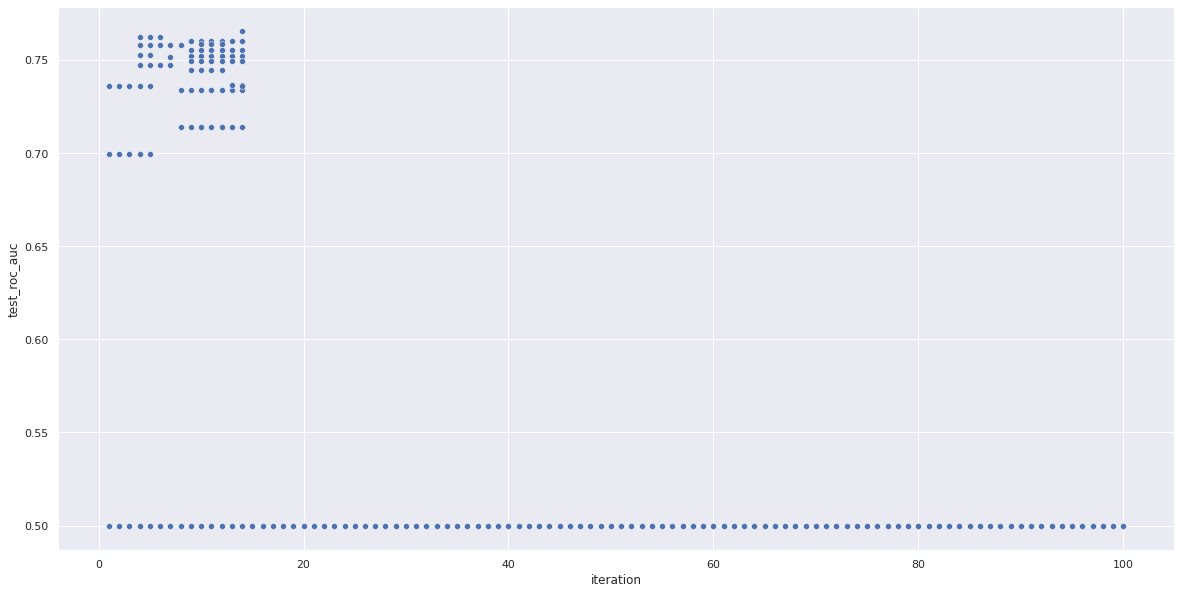

In [17]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==140445992065008]

sns.scatterplot(x="iteration", y="test_roc_auc", data=df_single)

<AxesSubplot:xlabel='iteration', ylabel='fit_time'>

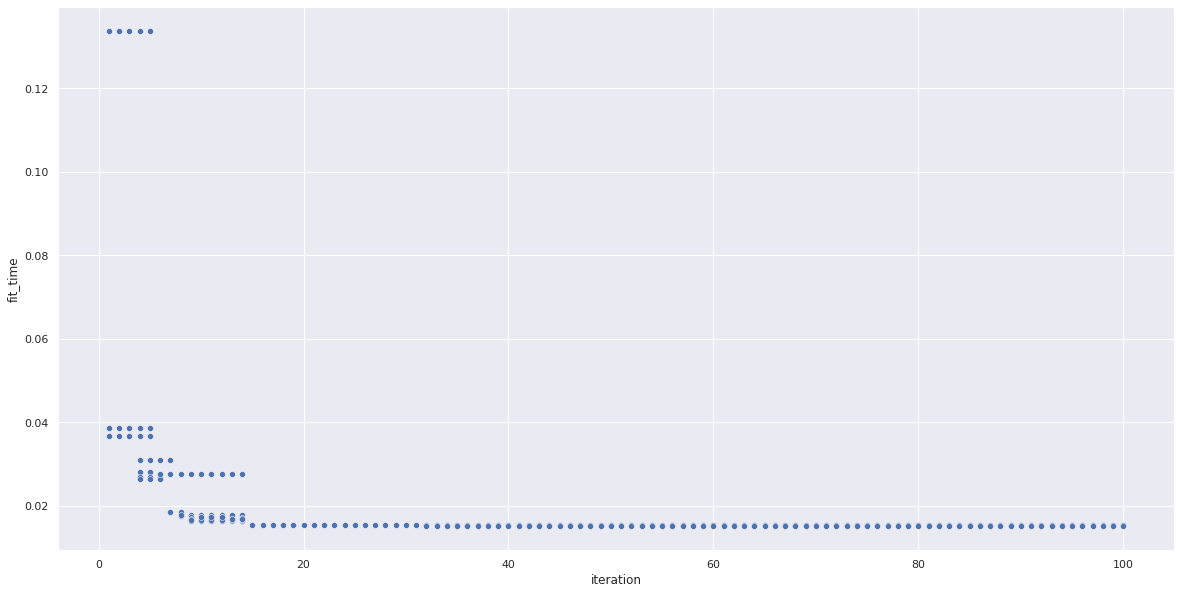

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==140445992065008]

sns.scatterplot(x="iteration", y="fit_time", data=df_single)

<AxesSubplot:xlabel='iteration', ylabel='ndf_size'>

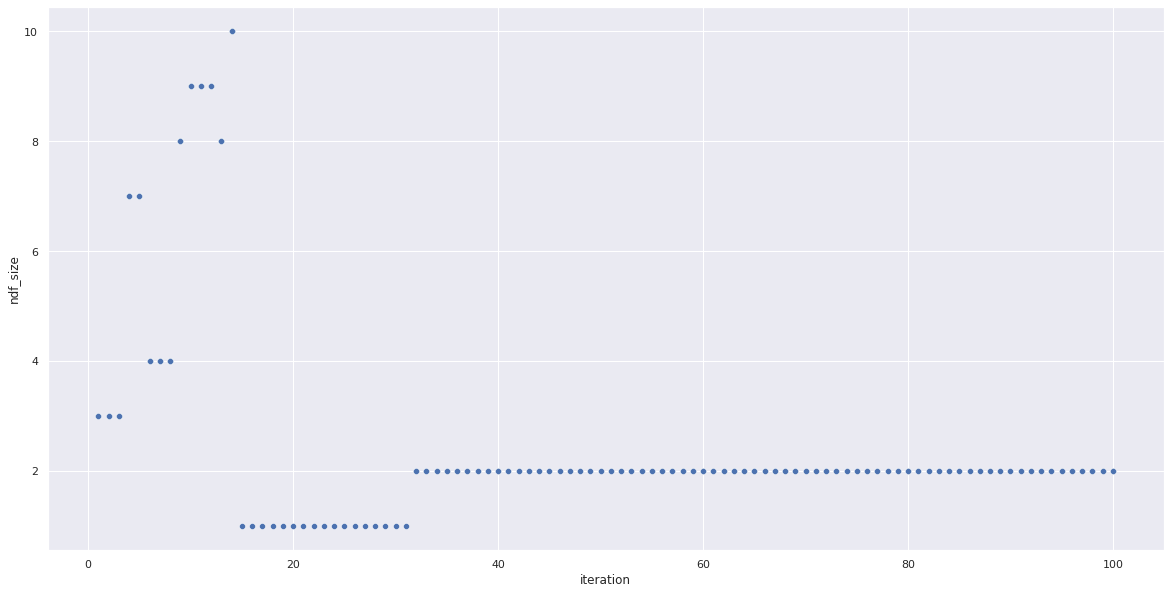

In [19]:
f, ax = plt.subplots(figsize=(20, 10))
df_single = df[df.model_id==140445992065008]

sns.scatterplot(x="iteration", y="ndf_size", data=df_single)

<AxesSubplot:xlabel='test_roc_auc', ylabel='fit_time'>

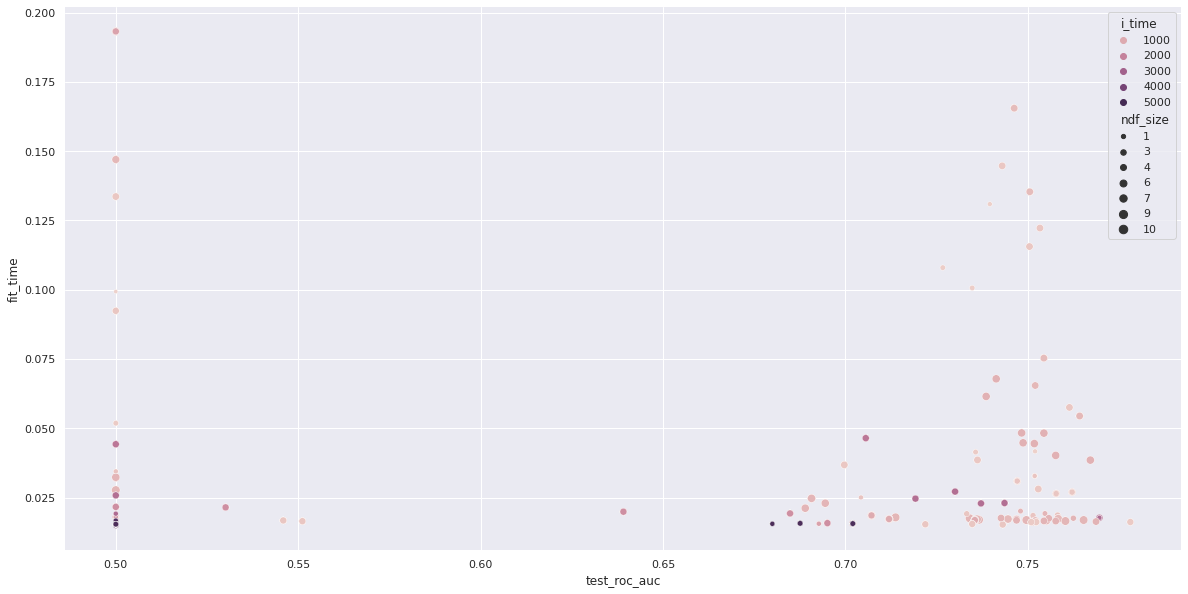

In [20]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="test_roc_auc", y="fit_time",
                hue="i_time", size="ndf_size",
                data=df, ax=ax)

## Final results: all samples

In [21]:
data = get_data("results_paper/open_ml_1049/dataset.*.pkl")
data

,criterion,max_depth,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,n_estimators,fit_time,score_time,test_f1,test_roc_auc
0,gini,61.000000,0.500000,2.500000e-01,2.500000e-01,sqrt,505,0.710772,0.094134,0.000000,0.858696
1,entropy,31.000000,0.750000,1.250000e-01,3.750000e-01,sqrt,752,0.972053,0.133970,0.000000,0.500000
2,gini,90.000000,0.250000,3.750000e-01,1.250000e-01,log2,257,0.373163,0.071908,0.000000,0.500000
3,gini,46.000000,0.625000,6.250000e-02,4.375000e-01,log2,133,0.186023,0.028879,0.000000,0.836822
4,entropy,105.000000,0.125000,3.125000e-01,1.875000e-01,sqrt,628,0.862586,0.116507,0.000000,0.788737
...,...,...,...,...,...,...,...,...,...,...,...
1005,gini,103.223420,0.064604,1.843850e-11,1.532728e-15,log2,632,1.096209,0.127250,0.206705,0.918618
1006,gini,103.223420,0.212864,1.843850e-11,4.859257e-14,log2,632,0.989894,0.122440,0.000000,0.892303
1007,gini,103.972264,0.011444,1.843850e-11,3.995099e-13,log2,632,1.187727,0.132995,0.377450,0.922851
1008,gini,102.908405,0.105250,1.658110e-11,7.332780e-14,log2,632,1.052771,0.125557,0.040404,0.908569


<AxesSubplot:xlabel='test_roc_auc', ylabel='fit_time'>

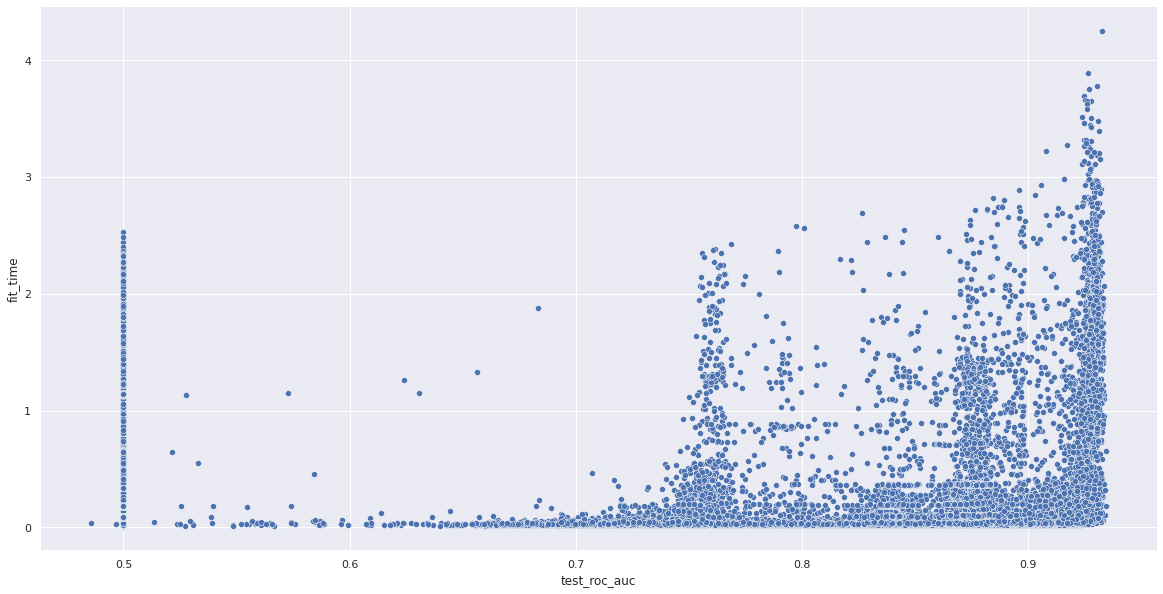

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="test_roc_auc", y="fit_time",
                data=data, ax=ax)